In [10]:
import os, shutil

In [11]:
# The directory where we will
# store our smaller dataset
base_dir = '/ProjectDir'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validate')

# Directory with our training Regular Coke pictures
train_Coke_dir = os.path.join(train_dir, 'CocaCoke')

# Directory with our training Diet Coke pictures
train_Diet_dir = os.path.join(train_dir, 'DietCoka')

# Directory with our training Apple Joya pictures
train_Apple_dir = os.path.join(train_dir, 'JoyaManzana')

# Directory with our training Fanta pictures
train_Fanta_dir = os.path.join(train_dir, 'Fanta')

# Directory with our training Pepsi Cola pictures
train_Pepsi_dir = os.path.join(train_dir, 'Pepsi')

# Directory with our validation Regular Coke pictures
validation_Coke_dir = os.path.join(validation_dir, 'CocaCola')

# Directory with our validation Diet Coke pictures
validation_Diet_dir = os.path.join(validation_dir, 'DietCoke')

# Directory with our validation Apple Joya pictures
validation_Apple_dir = os.path.join(validation_dir, 'JoyaManzana')

# Directory with our validation Fanta pictures
validation_Fanta_dir = os.path.join(validation_dir, 'Fanta')

# Directory with our validation Pepsi Cola pictures
validation_Pepsi_dir = os.path.join(validation_dir, 'Pepsi')

# 1: Coca, 2: Dieta, 3: Manzana, 4: Fanta, 5: Pepsi

In [12]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='sigmoid'))


In [13]:
from keras import optimizers

model.compile(loss='mean_squared_error',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(224, 224),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(224, 224),
        batch_size=20,
        class_mode='categorical')

Found 334 images belonging to 5 classes.
Found 146 images belonging to 5 classes.


In [15]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 224, 224, 3)
labels batch shape: (20, 5)


In [16]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
 47/100 [=============>................] - ETA: 3:16 - loss: 0.1555 - acc: 0.3620

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [ ]:
model.save('CarCrashModelMk1.h5')

# Prueba de modelo

In [33]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

In [34]:
model = load_model('AlphaModelMk1.h5')

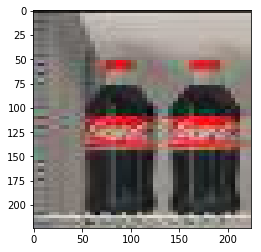

In [35]:
# load an image from file
image1 = load_img('Coca.jpg', target_size=(224,224))
plt.imshow(image1)

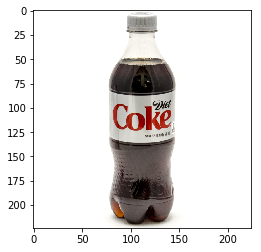

In [26]:
# load an image from file
image2 = load_img('Diet.jpg', target_size=(224,224))
plt.imshow(image2)

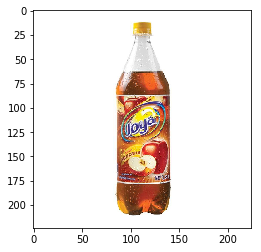

In [27]:
# load an image from file
image3 = load_img('Manzana.jpg', target_size=(224,224))
plt.imshow(image3)

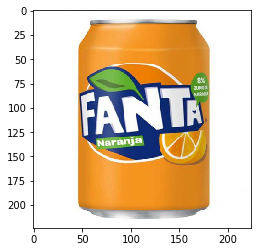

In [28]:
# load an image from file
image4 = load_img('Fanta.jpg', target_size=(224,224))
plt.imshow(image4)

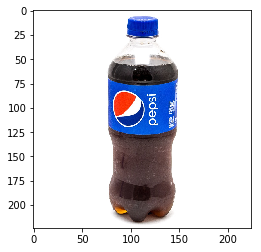

In [29]:
# load an image from file
image5 = load_img('Pepsi.jpg', target_size=(224,224))
plt.imshow(image5)

In [30]:
image1= img_to_array(image1)
#image1 /=255
image2= img_to_array(image2)
#image1 /=255
image3= img_to_array(image3)
#image1 /=255
image4= img_to_array(image4)
#image1 /=255
image5= img_to_array(image5)
#image1 /=255

In [31]:
image1 = image1.reshape((1,image1.shape[0], image1.shape[1], image1.shape[2]))
image2 = image2.reshape((1,image2.shape[0], image2.shape[1], image2.shape[2]))
image3 = image3.reshape((1,image3.shape[0], image3.shape[1], image3.shape[2]))
image4 = image4.reshape((1,image4.shape[0], image4.shape[1], image4.shape[2]))
image5 = image5.reshape((1,image5.shape[0], image5.shape[1], image5.shape[2]))

In [32]:
# predict the probability across all output classes
pred1 = model.predict(image1)
print(pred1)
pred2 = model.predict(image2)
print(pred2)
pred3 = model.predict(image3)
print(pred3)
pred4 = model.predict(image4)
print(pred4)
pred5 = model.predict(image5)
print(pred5)

[[1. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 1.]]


# Precisión del ~80%

In [ ]:
# load an image from file
image1 = load_img('section1.jpg', target_size=(224,224))
plt.imshow(image1)

In [36]:
image1= img_to_array(image1)
#image1 /=255
image1 = image1.reshape((1,image1.shape[0], image1.shape[1], image1.shape[2]))

In [37]:
# predict the probability across all output classes
pred1 = model.predict(image1)
print(pred1)

[[1. 0. 0. 0. 0.]]
